In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# df = pd.read_csv('train.csv', thousands = '.')
df = pd.read_csv('train.csv')
df

,일시,광진구,동대문구,성동구,중랑구
0,20180101,0.592,0.368,0.580,0.162
1,20180102,0.840,0.614,1.034,0.260
2,20180103,0.828,0.576,0.952,0.288
3,20180104,0.792,0.542,0.914,0.292
4,20180105,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1456,20211227,3.830,3.416,2.908,2.350
1457,20211228,4.510,3.890,3.714,2.700
1458,20211229,4.490,3.524,3.660,2.524
1459,20211230,4.444,3.574,3.530,2.506


In [3]:
print(df[df['일시'] == 20190907])

           일시  광진구  동대문구  성동구  중랑구
614  20190907  0.0   0.0  0.0  0.0


In [4]:
print(df[df['일시'] == 20190906])
print(df[df['일시'] == 20190908])

           일시   광진구   동대문구    성동구    중랑구
613  20190906  2.02  1.396  1.504  1.024
           일시   광진구   동대문구    성동구    중랑구
615  20190908  5.83  2.658  4.188  2.482


In [5]:
df.loc[614] = [20190907, 3.93, 2.027, 2.846, 1.753]
print(df[613:616])

           일시   광진구   동대문구    성동구    중랑구
613  20190906  2.02  1.396  1.504  1.024
614  20190907  3.93  2.027  2.846  1.753
615  20190908  5.83  2.658  4.188  2.482


In [6]:
df1 = pd.read_csv('서울특별시_공공자전거 일별 대여건수_(2018_2019.03).csv', encoding='cp949', thousands = ',')
df2 = pd.read_csv('서울특별시 공공자전거 일별 대여건수(2019.4_5).csv', thousands = ',')
df3 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_20190601_20191130.csv', thousands = ',')
df4 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_2019.12.01_2020.05.31.csv', thousands = ',')
df5 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_2020.06.01_2020.06.30.csv', thousands = ',')
df6 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_2020.07.01_2021.01.31.csv', encoding='cp949', thousands = ',')
df7 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_21.02.01_21.06.30.csv', encoding='cp949', thousands = ',')
df8 = pd.read_csv('서울특별시 공공자전거 일별 대여건수_21.07-21.12.csv', encoding='cp949', thousands = ',')
df3

,대여일시,대여건수
0,2019-06-01,79878
1,2019-06-02,77091
2,2019-06-03,82911
3,2019-06-04,83576
4,2019-06-05,81515
...,...,...
177,2019-11-26,52464
178,2019-11-27,46248
179,2019-11-28,46983
180,2019-11-29,44689


In [7]:
print(df3[df3['대여일시'] == '2019-09-06'])
print(df3[df3['대여일시'] == '2019-09-08'])

          대여일시   대여건수
97  2019-09-06  16631
          대여일시   대여건수
98  2019-09-08  52055


In [8]:
typhoon = pd.DataFrame([['2019-09-07',34343]],columns=df3.columns)
df3 = pd.concat([df3.iloc[:98], typhoon, df3.iloc[98:]], ignore_index = True)
print(df3[97:100])

          대여일시   대여건수
97  2019-09-06  16631
98  2019-09-07  34343
99  2019-09-08  52055


In [9]:
in_df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])
in_df = in_df.drop(['대여일자','대여일시'],axis=1)
in_df.reset_index(inplace=True,drop=True)

In [10]:
print(df.info())
print(in_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      1461 non-null   int64  
 1   광진구     1461 non-null   float64
 2   동대문구    1461 non-null   float64
 3   성동구     1461 non-null   float64
 4   중랑구     1461 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 57.2 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   대여건수    1461 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB
None


In [11]:
df = pd.concat([df,in_df],axis=1)
df

,일시,광진구,동대문구,성동구,중랑구,대여건수
0,20180101,0.592,0.368,0.580,0.162,4950
1,20180102,0.840,0.614,1.034,0.260,7136
2,20180103,0.828,0.576,0.952,0.288,7156
3,20180104,0.792,0.542,0.914,0.292,7102
4,20180105,0.818,0.602,0.994,0.308,7705
...,...,...,...,...,...,...
1456,20211227,3.830,3.416,2.908,2.350,42521
1457,20211228,4.510,3.890,3.714,2.700,51268
1458,20211229,4.490,3.524,3.660,2.524,52017
1459,20211230,4.444,3.574,3.530,2.506,48993


In [12]:
df.columns = ['date','Gwangjin-gu','Dongdaemun-gu','Seongdong-gu','Jungnang-gu','sum']

In [13]:
weather = pd.read_csv('weather.csv', encoding='cp949')
weather

,지점,지점명,일시,평균기온(°C),일강수량(mm),최대 풍속(m/s),합계 일사량(MJ/m2),평균 전운량(1/10)
0,108,서울,2018-01-01,-1.3,NaN,3.8,6.14,1.0
1,108,서울,2018-01-02,-1.8,NaN,4.9,5.36,2.3
2,108,서울,2018-01-03,-4.7,NaN,3.5,6.56,3.6
3,108,서울,2018-01-04,-4.7,NaN,3.5,4.73,6.5
4,108,서울,2018-01-05,-3.0,NaN,3.6,5.96,3.6
...,...,...,...,...,...,...,...,...
1456,108,서울,2021-12-27,-7.6,0.0,3.1,6.09,3.1
1457,108,서울,2021-12-28,-4.1,NaN,3.1,4.32,4.1
1458,108,서울,2021-12-29,0.4,0.2,5.9,4.64,5.1
1459,108,서울,2021-12-30,-3.9,0.0,6.6,9.14,2.0


In [14]:
weather = weather.drop(['지점','지점명','일시'],axis=1)
weather.columns = ['temp','rainfall','wind speed','solar radiation','clouds']
weather = weather.fillna(0)
weather.head()

,temp,rainfall,wind speed,solar radiation,clouds
0,-1.3,0.0,3.8,6.14,1.0
1,-1.8,0.0,4.9,5.36,2.3
2,-4.7,0.0,3.5,6.56,3.6
3,-4.7,0.0,3.5,4.73,6.5
4,-3.0,0.0,3.6,5.96,3.6


In [15]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             1461 non-null   float64
 1   rainfall         1461 non-null   float64
 2   wind speed       1461 non-null   float64
 3   solar radiation  1461 non-null   float64
 4   clouds           1461 non-null   float64
dtypes: float64(5)
memory usage: 57.2 KB


In [16]:
# sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
# fig=plt.gcf()
# fig.set_size_inches(10,8)
# plt.show()

In [17]:
# sns.pairplot(data=df)
# plt.show()

In [18]:
data = df.drop('Gwangjin-gu', axis=1).values
target = df['Gwangjin-gu'].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [20]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 7, include_bias=False) #최고 차수를 5제곱까지 특성을 만든다.
poly.fit(X_train)
train_poly = poly.transform(X_train)
test_poly = poly.transform(X_test)
print(train_poly.shape)

(1095, 791)


In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_poly,y_train)
print(lr.score(train_poly,y_train))
print(lr.score(test_poly,y_test))

0.978932056481233
0.9796573581724975


In [22]:
#표준점수로 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [23]:
#릿지 회귀 규제
from sklearn.linear_model import Ridge
ridge = Ridge()

In [24]:
#최적의 alpha 값 찾기
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [25]:
alpha_list = [0.001,0.01,0.1,1,10] #10배씩 늘리기
for alpha in alpha_list:
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, y_train)
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

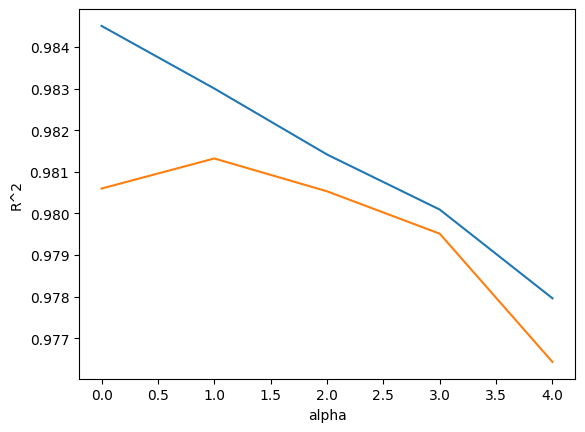

In [26]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [27]:
ridge = Ridge(alpha = 0.01)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9830029869618762
0.9813218851145713


- 0.9830029869618762
- 0.9813218851145713

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [29]:
train_score = []
test_score = []

alpha_list = [0.00001,0.0001,0.001,0.01,0.1] #10배씩 늘리기
for alpha in alpha_list:
    lasso = Lasso(alpha = alpha)
    lasso.fit(train_scaled, y_train)
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

c:\Users\wooji\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.259e+01, tolerance: 1.366e+00
  model = cd_fast.enet_coordinate_descent(


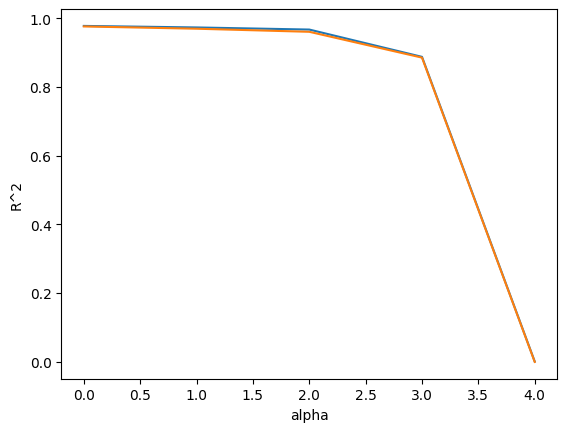

In [30]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha = 0.01)
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))